Better One : https://github.com/ai-with-nur/Age-Gender-Prediction/blob/master/AgeGender.py

In [10]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.transform import resize

In [11]:
# Loading the different trained model for gender and age determination

age_model = cv2.dnn.readNetFromCaffe(r'C:\Users\amany\Downloads\gad\age_deploy.prototxt', r'C:\Users\amany\Downloads\gad\age_net.caffemodel')
gender_model = cv2.dnn.readNetFromCaffe(r'C:\Users\amany\Downloads\gad\gender_deploy.prototxt', r'C:\Users\amany\Downloads\gad\gender_net.caffemodel')

In [12]:
# values used in pretrained model

mean_values = (78.4263377603,87.7689143744,114.895847746)
age_values = ['(0,2)','(4,6)','(8,12)','(15,20)','(25,32)','(38,43)','(48,53)','(60,100)']
gender_values = ['Male','Female']

In [13]:
# Reading the image

newimage = imread(r'C:\Users\amany\Downloads\gad\girl2.jpg',as_gray=False)

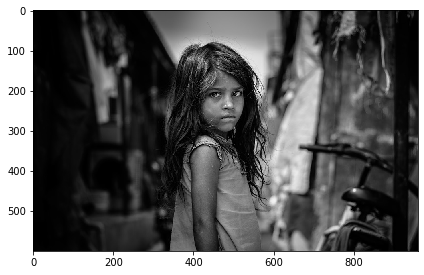

In [14]:
# cropping the face from the image using face algorithm

minisize = (newimage.shape[1],newimage.shape[0])
miniframe = cv2.resize(newimage,minisize)
imshow(miniframe)

In [15]:
facedata = "haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(facedata)
faces = cascade.detectMultiScale(miniframe)

for (x,y,w,h) in faces:
    cv2.rectangle(newimage,(x,y),(x+w,y+h),(255,255,0),2)
    new_img = newimage[y:y+h,x:x+w].copy()
    img_blob = cv2.dnn.blobFromImage(new_img,1,(227,227),mean_values,swapRB=False)

In [16]:
# predicting gender
plt.figure(1,figsize=(20,20))
gender_model.setInput(img_blob)
gender_predicted=gender_model.forward()
gender = gender_values[gender_predicted[0].argmax()]
print("Gender : " + gender)

# predicting age
plt.figure(1,figsize=(20,20))
age_model.setInput(img_blob)
age_predicted=age_model.forward()
age = age_values[age_predicted[0].argmax()]
print("Age : " + age)

Gender : Female
Age : (25,32)


<Figure size 1440x1440 with 0 Axes>

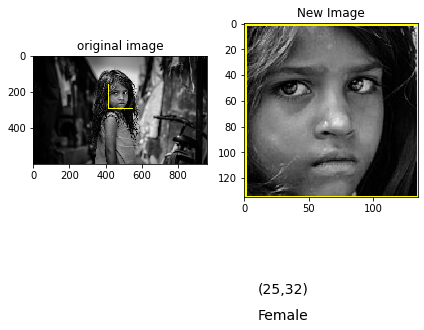

In [17]:
plt.subplot(121)
imshow(newimage)
plt.title("original image")

plt.subplot(122)
imshow(new_img)
plt.title("New Image")

plt.text(10,y+70,gender,fontsize=14)
plt.text(10,y+50,age,fontsize=14)
plt.show()